In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from random import random
import array
import math as m
from __future__ import division

# Ejercicio 1

In [3]:
def modulo(x):
    modulo = 2**32
    multiplicador = 1013904223
    incremento = 1664525
    return (x*multiplicador + incremento) % modulo

In [4]:
numeros = []

Para obtener un algoritmo que genere números entre 0 y 1, se divide el resultado del GCL por 2^32, lo que asegura que el resultado siempre estará en ese intervalo

In [5]:
x = 96102
for i in range(100000):
    numeros.insert(i, modulo(x)/(2**32))
    x = modulo(x)

In [6]:
bins_list = np.unique(numeros)

(array([1., 1., 1., ..., 1., 1., 2.]),
 array([1.20862387e-06, 1.33505091e-06, 1.93133019e-05, ...,
        9.99959746e-01, 9.99968419e-01, 9.99976413e-01]),
 <a list of 99999 Patch objects>)

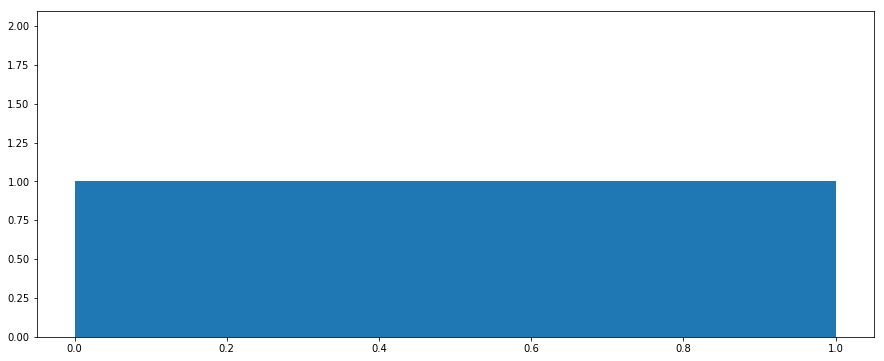

In [8]:
plt.figure(figsize=(15,6))
plt.hist(numeros, bins = bins_list)

# Ejercicio 5

Definimos una función para saber si el número pertenece al intervalo que nos interesa

In [7]:
def estaEnElIntervalo(x):
    return ((x < 0.5 and x > 0.2) or x == 0.5 or x == 0.2)

Definimos una función para devolver la longitud gap del valor en el índice que obtenemos por parámetro

In [8]:
def longitudGap(arreglo, i):
    longitudGap = 0
    if (i < len(arreglo)):
        if (estaEnElIntervalo(arreglo[i]) == True and i+1 < len(arreglo)):
            i = i + 1
            while (estaEnElIntervalo(arreglo[i]) == False and i < len(arreglo)):
                longitudGap = longitudGap + 1
                if  (i < len(arreglo)):
                    i = i + 1
    return longitudGap

Creamos un arreglo para cargar las longitudes Gap que vamos calculando para cada valor del arreglo que guarda los números generados

In [9]:
longitudes = []

In [10]:
for i in range(len(numeros)):
    if(estaEnElIntervalo(numeros[i])):
        lenght = longitudGap(numeros, i)
        longitudes.insert(i, lenght)

Obtenemos un arreglo que contiene la cantidad de veces que encontramos cada longitud Gap en el arrego de números, ordenado por cada longitud Gap

In [11]:
(unique, counts) = np.unique(longitudes, return_counts=True)
frequencies = np.asarray((unique, counts)).T

La probabilidad de la longitd gap cero es la longitud del intervalo en el que buscamos a cada número

In [12]:
p = 0.5 - 0.2

La probabilidad de cada longitud gap es la probabilidad de la longitud cero multiplicada por la probabilidad de que el número no esté en el intervalo, elevado a dicha longitud gap

In [13]:
def probabilidadGap(x, p):
    return p*((1 - p)**x)

Guardamos cada longitud Gap y su probabilidad en un arreglo

In [14]:
probabilidades = []

In [15]:
for i in np.unique(longitudes):
    probabilidades.insert(len(probabilidades),probabilidadGap(i, 0.3))

In [16]:
list_bin = np.unique(longitudes)

Graficamos la frecuencia de cada longitud gap

(array([8.930e+03, 6.443e+03, 4.456e+03, 3.082e+03, 2.149e+03, 1.444e+03,
        1.028e+03, 7.830e+02, 5.250e+02, 3.740e+02, 2.500e+02, 1.730e+02,
        9.700e+01, 8.300e+01, 6.400e+01, 4.400e+01, 3.500e+01, 1.700e+01,
        2.500e+01, 1.200e+01, 8.000e+00, 6.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 37]),
 <a list of 29 Patch objects>)

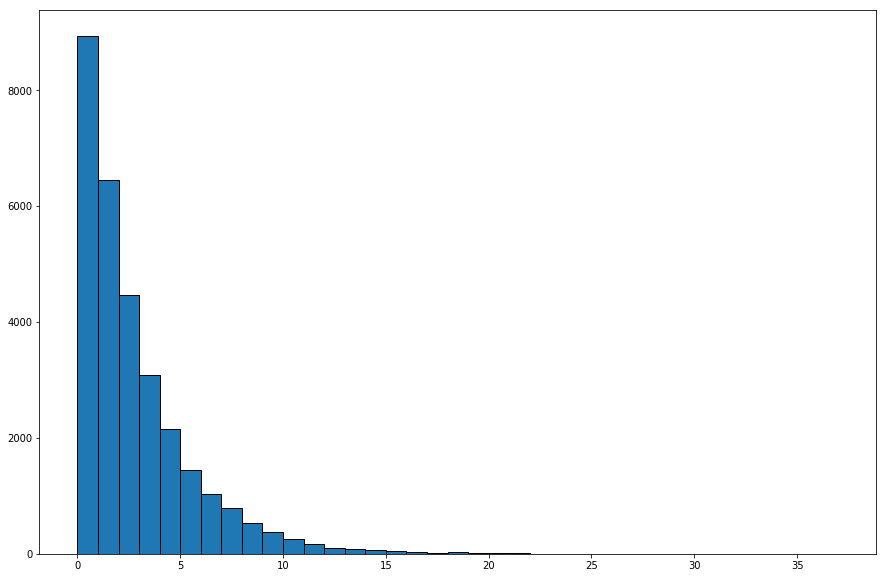

In [17]:
plt.figure(figsize=(15,10))
plt.hist(longitudes, bins = list_bin, ec = 'black')

Las frecuencias observadas se separan de las longitudes gap, en un solo arreglo

In [18]:
import scipy.stats as st

In [19]:
frecuencias_observadas = np.unique(longitudes, return_counts=True)
frecuencias_observadas = frecuencias_observadas[1]

Se obtienen las frecuencias esperadas multiplicando el arreglo de probabilidades de cada longitud gap por la cantidad de números

In [20]:
frecuencias_esperadas = np.array(probabilidades)*100000

Obtenemos el valor de D2 y el p_valor con el test chi cuadrado que provee la biblioteca scipy.stats

In [21]:
(D2, p_valor) = st.chisquare(frecuencias_observadas, frecuencias_esperadas)

Imprimimos D2

In [22]:
print D2

48967.31837417554


Imprimimos el p_valor

In [26]:
print p_valor

0.0


Definimos el nivel de significación

In [24]:
alpha = 0.01

Aunque salta a la vista la conclusión, definimos una función booleana para saber en qué estado queda el test

In [25]:
if (p_valor < alpha):
    print "Se rechaza H0"
else:
    print "No se puede rechazar H0"

Se rechaza H0
